<a href="https://colab.research.google.com/github/Kondwani7/Hash-Analytic-company-attrition/blob/main/Hash_Analytic_Employee_Attrition_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/practice datasets/Hash-Analytic-Python-Analytics-Employee-Attrition-Problem-case-study-One - Sheet1.csv', index_col=0)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churned(Yes or No)
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,sales,low,0
2002,0.82,0.67,2,202,3,0,0,sales,low,0
2003,0.45,0.69,5,193,3,0,0,sales,low,0
2004,0.78,0.82,5,247,3,0,0,sales,low,0
2005,0.49,0.60,3,214,2,0,0,sales,low,0


#Data Investigation

In [ ]:
#different data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
Churned(Yes or No)         int64
dtype: object

In [ ]:
#shape of data. 15000 employees
data.shape

(14999, 10)

In [ ]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Churned(Yes or No)
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Churned(Yes or No)       0
dtype: int64

In [ ]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
promotion_last_5years      2
dept                      10
salary                     3
Churned(Yes or No)         2
dtype: int64

#Reasons employees are prone to leave

In [ ]:
#split data by existing employees and those who left
existing_employees = data[data['Churned(Yes or No)'] <1]
churned_employees = data[data['Churned(Yes or No)'] ==1]

In [ ]:
#number of existing employees = 11,428
existing_employees.shape

(11428, 10)

In [ ]:
#number of employees who left = 3,571
churned_employees.shape 

(3571, 10)

In [ ]:
existing_employees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Churned(Yes or No)
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.0
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.0
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,0.0


In [ ]:
#the average satifaction level of churned employees was 0.44 vs 0.667 for exisitng employees
#the last evaluation for both existing and churned employees was almost the same
#churned employees worked on average worked on slightly more projects 3.86 than existing employees 3.79
#churned employees worked on average worked more monthly hours 207 than existing employees 199
#churned employees spent more time on average at the company 3.88 than exisitng employees 3.38
#churned employees had less work accidents on average 0.047 than existing employees 0.175
#churned employees significantly less promotions over the last 5 years 0.005 than existing employees 0.026 
churned_employees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Churned(Yes or No)
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.0
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,0.0
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.0
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,1.0
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,1.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


the major departments ex-employees came from

In [ ]:
#the departments churned employees came from sales, technical or support
xe_department = churned_employees.groupby(['dept'])['Churned(Yes or No)'].count()
xe_department

dept
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: Churned(Yes or No), dtype: int64

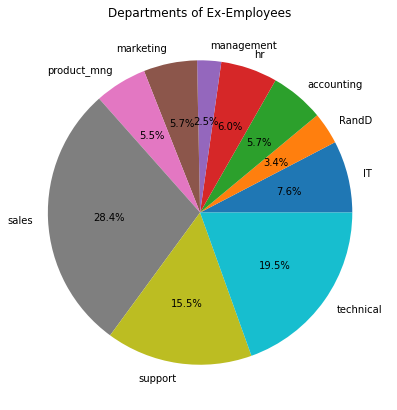

In [ ]:
# Creating labels
depts = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(xe_department, 
       labels = depts,
       autopct = lambda pct: func(pct, xe_department))


# show plot
plt.title('Departments of Ex-Employees')
plt.show()


Differences in salary of existing and ex employees

In [ ]:
#the salary levels of churned employees
xe_salary = churned_employees.groupby(['salary'])['Churned(Yes or No)'].count()
xe_salary

salary
high        82
low       2172
medium    1317
Name: Churned(Yes or No), dtype: int64

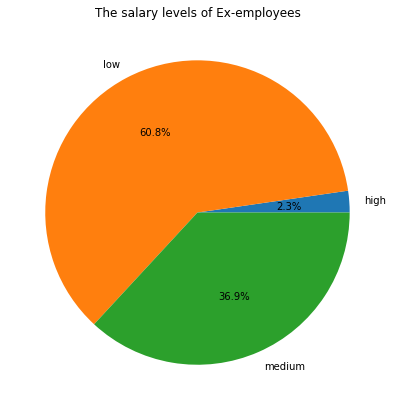

In [ ]:
# Labels dataset
salary = ['high','low','medium']

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(xe_salary, 
       labels = salary,
       autopct = lambda pct: func(pct, xe_salary))


# show plot
plt.title('The salary levels of Ex-employees')
plt.show()



In [ ]:
#the salary levels of exisitng employees
ce_salary = existing_employees.groupby(['salary'])['Churned(Yes or No)'].count()
ce_salary

salary
high      1155
low       5144
medium    5129
Name: Churned(Yes or No), dtype: int64

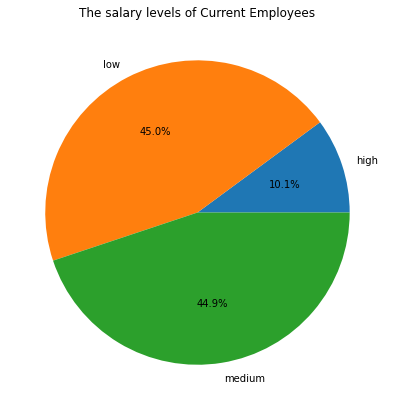

In [ ]:
# Creating labels
salary = ['high','low','medium']

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(ce_salary, 
       labels = salary,
       autopct = lambda pct: func(pct, ce_salary))


# show plot
plt.title('The salary levels of Current Employees')
plt.show()


#Data Exploration of the whole dataset

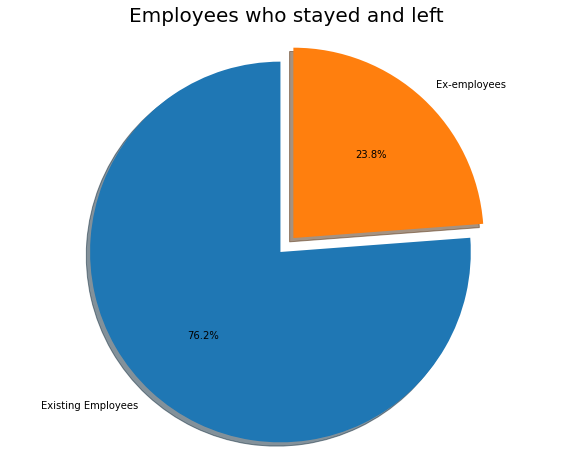

In [ ]:
# Getting the number of employees who left
labels = 'Existing Employees', 'Ex-employees'
size= [data['Churned(Yes or No)'][data['Churned(Yes or No)'] ==0].count(), 
       data['Churned(Yes or No)'][data['Churned(Yes or No)']==1].count() ]
explode = (0, 0.1)
fig1, ax1  = plt.subplots(figsize=(10,8))
ax1.pie(size, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Employees who stayed and left", size =20)
plt.show()

In [ ]:
#label encode salary and dept columns into continous variables so a complete correlation matrix can be created
cat_data = data.select_dtypes(exclude=[np.number]).columns
data[cat_data].head()
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in cat_data:
    data[i] = label_encoder.fit_transform(data[i])
data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churned(Yes or No)
Emp ID,,,,,,,,,,
2001,0.58,0.74,4,215,3,0,0,7,1,0
2002,0.82,0.67,2,202,3,0,0,7,1,0
2003,0.45,0.69,5,193,3,0,0,7,1,0
2004,0.78,0.82,5,247,3,0,0,7,1,0
2005,0.49,0.60,3,214,2,0,0,7,1,0
2006,0.36,0.95,3,206,4,0,0,7,1,0
2007,0.54,0.37,2,176,2,0,0,7,1,0
2008,0.99,0.91,5,136,4,0,0,7,1,0
2009,0.50,0.75,6,127,3,0,0,7,1,0


In [ ]:
data['dept'].nunique()

10

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    #filename = df.dataframeName
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Employees', fontsize=15)
    plt.show()

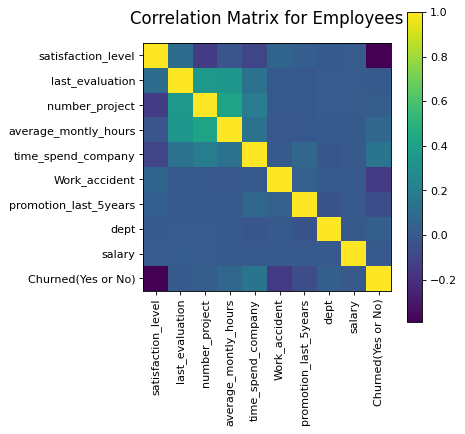

In [ ]:
plotCorrelationMatrix(data, 5)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(data, plotSize, textSize):
    data = data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    data = data.dropna('columns')
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    data = data[columnNames]
    ax = pd.plotting.scatter_matrix(data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot for Employees')
    plt.show()

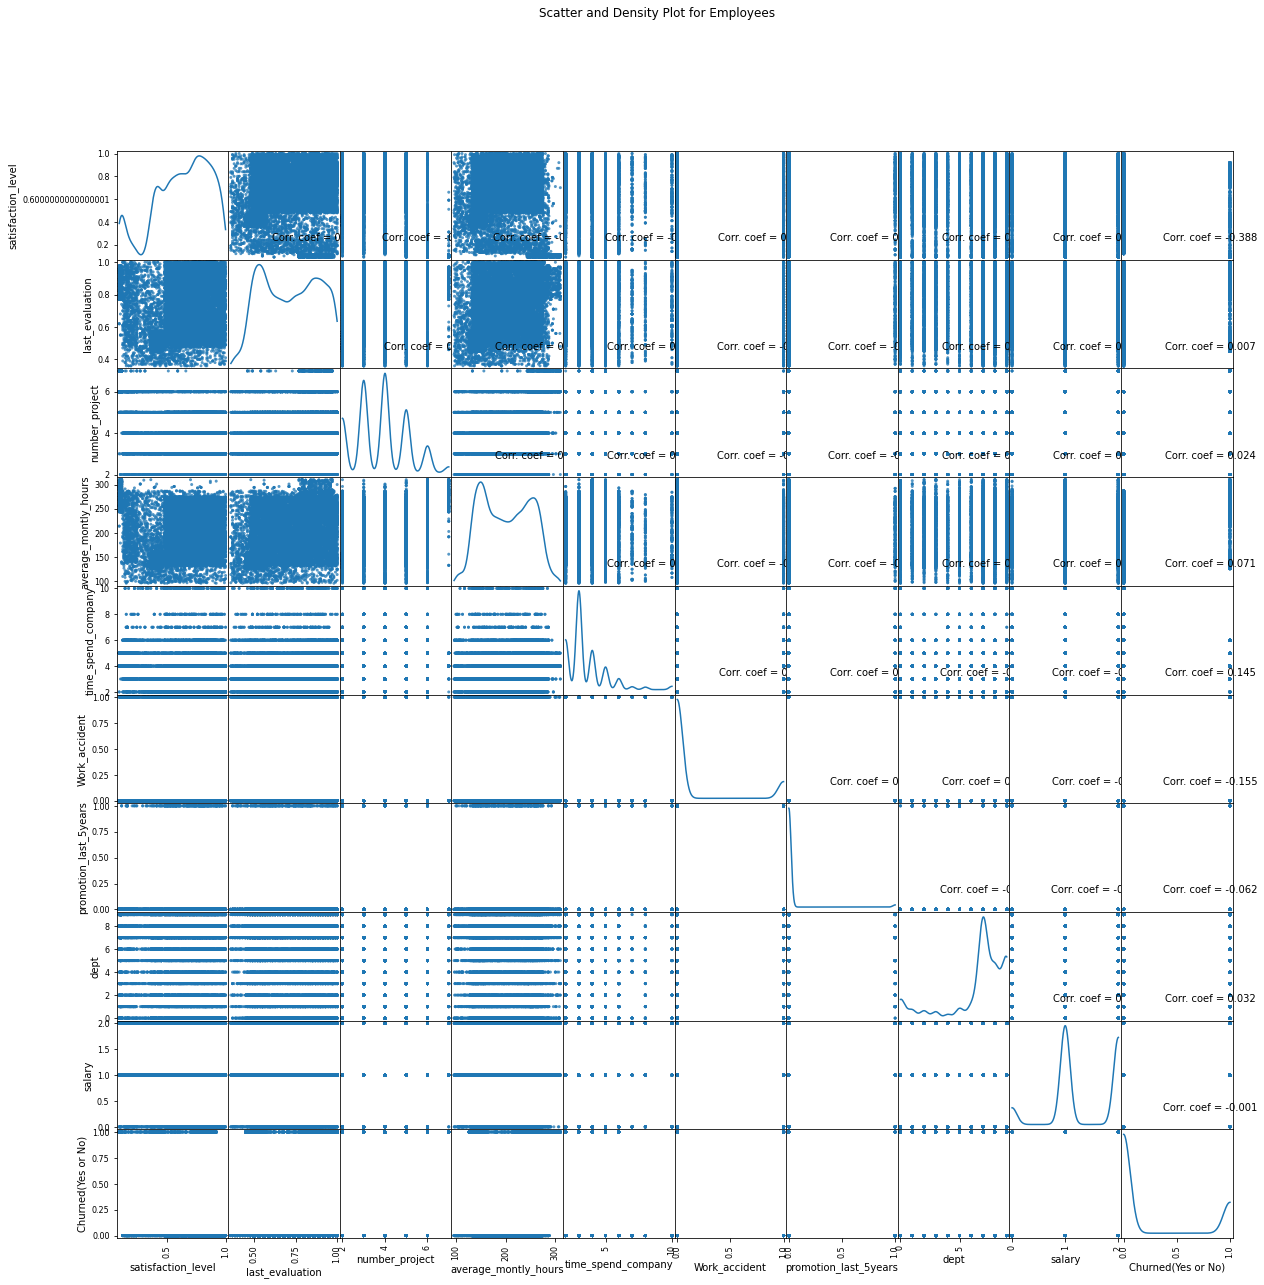

In [ ]:
plotScatterMatrix(data,20,10)

#Data Preprocessing for the model

In [ ]:
#shuffle the data
data = data.sample(frac = 1)
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Churned(Yes or No)
Emp ID,,,,,,,,,,
9658,0.58,0.49,2,107,3,0,0,9,2,0
9372,0.93,0.87,3,154,3,1,0,0,1,0
2835,0.66,0.63,6,223,6,0,0,7,2,0
11826,0.29,0.57,5,134,2,0,1,5,2,0
9981,0.53,0.62,4,201,3,0,0,8,2,0
8958,0.43,0.82,2,221,5,0,0,7,2,0
2696,0.86,0.65,3,161,3,0,0,7,1,0
12037,0.38,0.46,2,137,3,0,0,9,1,1
2223,0.26,0.63,6,100,4,0,0,7,2,0


In [ ]:
#drop duplicates to reduce overfitting
print(data.shape)
'''
data.drop_duplicates(keep="first", inplace=True)
print(data.shape)
'''

(14999, 10)


'\ndata.drop_duplicates(keep="first", inplace=True)\nprint(data.shape)\n'

In [ ]:
#split to target and input data
y = data['Churned(Yes or No)']
X = data.drop('Churned(Yes or No)', axis=1)

In [ ]:

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=7)

In [ ]:
#resample the data to remove outliers
print('Original dataset shape %s' % Counter(y_train))
rus = RandomUnderSampler(sampling_strategy='all', random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 7428, 1: 2321})
Resampled dataset shape Counter({0: 2321, 1: 2321})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#build a pipeline
'''
clf_pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(120,), max_iter= 500, activation='relu', solver='adam',random_state=42))
])
'''
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
rf_pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("rf",RandomForestClassifier())])


In [ ]:
#fit the data
#clf_pipe.fit(X_train, y_train)
rf_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [ ]:
#prediction
#y_pred = clf_pipe.predict(X_test)
y_pred2 = rf_pipeline.predict(X_test)

In [ ]:
def evaluate_model(clf, y_test, y_pred):
  s1 = accuracy_score(y_test, y_pred).round(3)
  s2 = precision_score(y_test, y_pred, average="weighted").round(3)
  s3 = recall_score(y_test, y_pred, average="weighted").round(3)
  s4 = f1_score(y_test, y_pred, average="weighted").round(3)
  s5 = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1], average='weighted').round(3)
  print("Accuracy", s1)
  print("Precision", s2)
  print('Recall', s3)
  print("F1 score", s4)
  print("ROC_AUC", s5)
  cm = confusion_matrix(y_test, y_pred, normalize="true")
  sns.heatmap(cm, annot=True)


Accuracy 0.986
Precision 0.986
Recall 0.986
F1 score 0.986
ROC_AUC 0.992


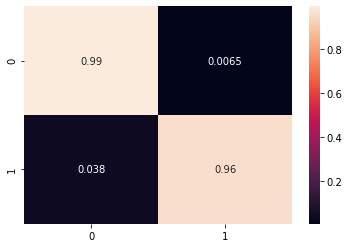

In [ ]:
#prediction
evaluate_model(rf_pipeline, y_test, y_pred2)
